In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from lib import DihedralAdherence
from lib import PDBMineQuery
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

Results already exist
PDB: 6poo
Structure exists: 'pdb/pdb6poo.ent' 
0/266: DQELGKQ
	Win 4: QELG - 2936 samples
	Win 5: QELGK - 253 samples
	Win 6: DQELGK - 0 samples
	Win 7: DQELGKQ - 0 samples
	Weighted n samples: 4454.0
	462 predictions
1/266: QELGKQS
	Win 4: ELGK - 4387 samples
	Win 5: ELGKQ - 258 samples
	Win 6: QELGKQ - 0 samples
	Win 7: QELGKQS - 0 samples
	Weighted n samples: 5935.0
	462 predictions
2/266: ELGKQSR
	Win 4: LGKQ - 1792 samples
	Win 5: LGKQS - 56 samples
	Win 6: ELGKQS - 3 samples
	Win 7: ELGKQSR - 0 samples
	Weighted n samples: 2149.0
	462 predictions
3/266: LGKQSRR
	Win 4: GKQS - 1360 samples
	Win 5: GKQSR - 11 samples
	Win 6: LGKQSR - 0 samples
	Win 7: LGKQSRR - 0 samples
	Weighted n samples: 1426.0
	467 predictions
4/266: GKQSRRS
	Win 4: KQSR - 500 samples
	Win 5: KQSRR - 47 samples
	Win 6: GKQSRR - 0 samples
	Win 7: GKQSRRS - 0 samples
	Weighted n samples: 782.0
	467 predictions
5/266: KQSRRSQ
	Win 4: QSRR - 1137 samples
	Win 5: QSRRS - 132 samples
	Win 6: KQ

/home/mmazeem/dev/protein-dihedral-visualization/lib/plotting.py:255: RuntimeWarning: Mean of empty slice
  color='red', lw=2, label='Regression Line'


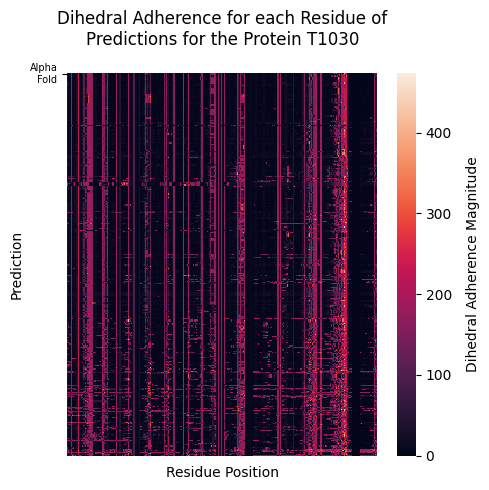

0


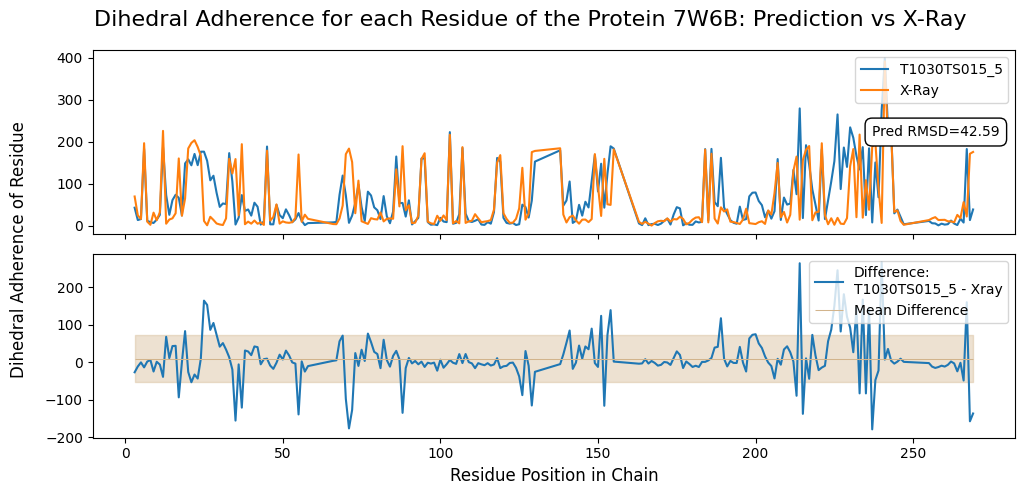

,pos,seq_ctxt,res,phi,psi,protein_id,da_pred,n_samples,da_scaled,da_na,da_xray,da_diff
0,3,DQELGKQ,L,-61.472706,-46.409441,T1030TS015_5,42.846815,4454.0,42.846815,False,69.479134,-26.632318
1,4,QELGKQS,G,-72.240079,-30.833373,T1030TS015_5,13.453955,5935.0,13.453955,False,24.709125,-11.255170
2,5,ELGKQSR,K,-60.527599,-46.141312,T1030TS015_5,15.804182,2149.0,15.804182,False,16.029764,-0.225582
3,6,LGKQSRR,Q,-78.426293,-32.347911,T1030TS015_5,182.741685,1426.0,142.191513,False,196.287364,-13.545679
4,7,GKQSRRS,S,-58.983061,-41.329550,T1030TS015_5,11.572837,782.0,4.938137,False,9.603609,1.969227
...,...,...,...,...,...,...,...,...,...,...,...,...
234,265,LQDLTRG,L,-75.218577,-28.065103,T1030TS015_5,16.673516,2288.0,16.673516,False,17.955937,-1.282421
235,266,QDLTRGT,T,-65.517028,-46.850096,T1030TS015_5,7.481336,3533.0,7.481336,False,56.138784,-48.657448
236,267,DLTRGTK,R,-62.097377,-40.857080,T1030TS015_5,182.417015,3371.0,182.417015,False,21.883081,160.533934
237,268,LTRGTKE,G,-73.784126,-28.353516,T1030TS015_5,13.352431,1107.0,8.065374,False,171.051767,-157.699335


In [139]:
WINDOW_SIZE = 4
WINDOW_SIZE_CONTEXT = 5
WINDOW_SIZE_CONTEXT2 = 6
PDBMINE_URL = os.getenv("PDBMINE_URL")
PROJECT_DIR = 'tests'
casp_protein_id = 'T1030'   # 6ya2

da = DihedralAdherence(casp_protein_id, [4,5,6,7], PDBMINE_URL, PROJECT_DIR, kdews=[1,32,64,128])
# da.compute_structures()
# da.query_pdbmine()
da.load_results()
da.compute_das(replace=True)
# da.load_results_da()
da.plot_heatmap()
da.plot_res_vs_da()

In [111]:
from Bio.PDB import PDBParser
from lib.constants import AMINO_ACID_CODES
structure = PDBParser().get_structure('6poo', 'pdb/pdb6poo.ent')
structure.atom_to_internal_coordinates()
seq = ''.join([AMINO_ACID_CODES.get(r.resname, 'X') for r in structure.get_residues()])
seq.find('WTGQS')
# names = [AMINO_ACID_CODES.get(r.resname, 'X') for r in list(structure.get_residues())[152:152+5]]
list(structure.get_residues())[239+2].internal_coord.get_angle('phi')

55.99937674099932

In [63]:
for protein in Path('tests').iterdir():
    casp_id = protein.name.split('_')[0]
    da = DihedralAdherence(casp_id, WINDOW_SIZE, WINDOW_SIZE_CONTEXT, PDBMINE_URL, PROJECT_DIR)
    da.load_results()
    da.compute_mds(replace=True)

Results already exist
PDB: 6t1z
Structure exists: 'pdb/pdb6t1z.ent' 
0/393: KEFWNL - win5: 56, win6: 0
(1, 2) (484, 2) (56, 3) (0, 3)
1/393: EFWNLD - win5: 19, win6: 0
(1, 2) (484, 2) (19, 3) (0, 3)
2/393: FWNLDK - win5: 8, win6: 0
(1, 2) (484, 2) (8, 3) (0, 3)
3/393: WNLDKN - win5: 23, win6: 0
(1, 2) (484, 2) (23, 3) (0, 3)
4/393: NLDKNL - win5: 39, win6: 8
	Enough context data for KDE - Using Full Context
(1, 2) (484, 2) (39, 3) (8, 3)
5/393: LDKNLQ - win5: 106, win6: 6
	Enough context data for KDE - Using Full Context
(1, 2) (484, 2) (106, 3) (6, 3)
6/393: DKNLQL - win5: 30, win6: 0
(1, 2) (484, 2) (30, 3) (0, 3)
7/393: KNLQLR - win5: 149, win6: 24
	Enough context data for KDE - Using Full Context
(1, 2) (484, 2) (149, 3) (24, 3)
8/393: NLQLRL - win5: 134, win6: 0
(1, 2) (484, 2) (134, 3) (0, 3)
9/393: LQLRLG - win5: 170, win6: 3
	Enough context data for KDE - Using Full Context
(1, 2) (484, 2) (170, 3) (3, 3)
10/393: QLRLGI - win5: 48, win6: 2
(1, 2) (484, 2) (48, 3) (2, 3)
11/393:

In [ ]:
targetlist = pd.read_csv('targetlist.csv', sep=';')
for target in targetlist.Target.unique():
    try:
        da = DihedralAdherence(target, WINDOW_SIZE, WINDOW_SIZE_CONTEXT, PDBMINE_URL, PROJECT_DIR)
    except ValueError as e:
        print(f'Skipping {target}: {e}')
    da.compute_structures()
    da.query_pdbmine()
    da.compute_mds()

In [142]:
from lib.fit_model_on_multiple import fit_lr, plot_md_vs_rmsd
import os
PDBMINE_URL = os.getenv("PDBMINE_URL")
PROJECT_DIR = 'tests'

# model, grouped_preds = fit_model_on_multiple(['T1056', 'T1038', 'T1025', 'T1028'], WINDOW_SIZE, WINDOW_SIZE_CONTEXT, PDBMINE_URL, n_comp=2000)
model, grouped_preds = fit_lr(
    ['T1024', 'T1096', 'T1027', 'T1082', 'T1091', 'T1058', 'T1049', 'T1030', 'T1056', 'T1038', 'T1025', 'T1028'], 
    [4,5,6,7], [1,32,64,128],
    PDBMINE_URL, PROJECT_DIR,
    n_comp=2000,
)
plot_md_vs_rmsd(grouped_preds)

Results already exist
PDB: 6t1z
Structure exists: 'pdb/pdb6t1z.ent' 
0/393: GKEFWNL
	Win 4: KEFW - 432 samples
	Win 5: KEFWN - 56 samples
	Win 6: GKEFWN - 0 samples
	Win 7: GKEFWNL - 0 samples
	Weighted n samples: 768.0
	0 predictions
No predictions seq GKEFWNL
1/393: KEFWNLD
	Win 4: EFWN - 201 samples
	Win 5: EFWNL - 19 samples
	Win 6: KEFWNL - 0 samples
	Win 7: KEFWNLD - 0 samples
	Weighted n samples: 315.0
	484 predictions
2/393: EFWNLDK
	Win 4: FWNL - 350 samples
	Win 5: FWNLD - 8 samples
	Win 6: EFWNLD - 0 samples
	Win 7: EFWNLDK - 0 samples
	Weighted n samples: 398.0
	484 predictions
3/393: FWNLDKN
	Win 4: WNLD - 260 samples
	Win 5: WNLDK - 23 samples
	Win 6: FWNLDK - 0 samples
	Win 7: FWNLDKN - 0 samples
	Weighted n samples: 398.0
	484 predictions
4/393: WNLDKNL
	Win 4: NLDK - 2339 samples
	Win 5: NLDKN - 39 samples
	Win 6: WNLDKN - 0 samples
	Win 7: WNLDKNL - 0 samples
	Weighted n samples: 2573.0
	484 predictions
5/393: NLDKNLQ
	Win 4: LDKN - 2174 samples
	Win 5: LDKNL - 106 sa